In [1]:
import os
import librosa 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
#visualizing single audio


In [3]:
random_file_name ="./000002.mp3"

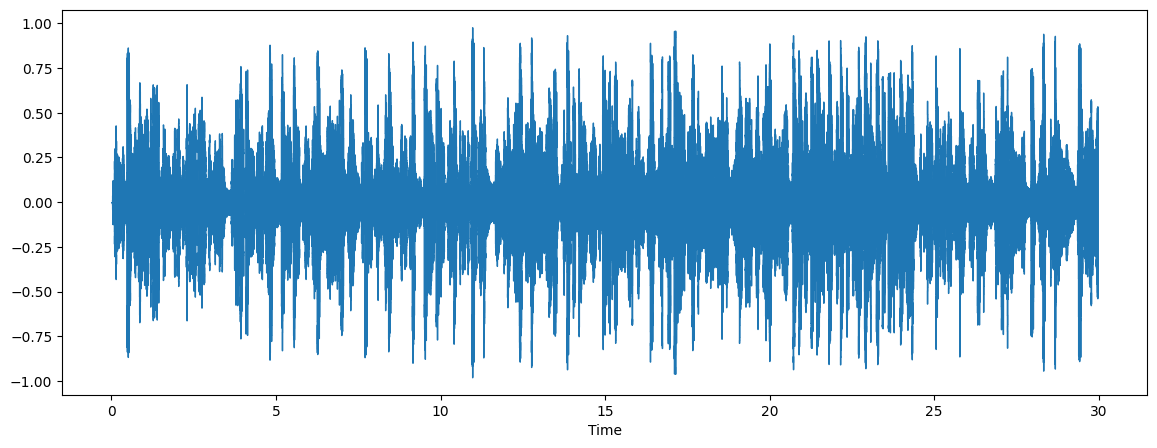

In [4]:
y,sr = librosa.load(random_file_name,sr = 44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [5]:
y.shape

(1321967,)

In [6]:
from IPython.display import Audio
Audio(data = y,rate =sr)

In [7]:
y

array([ 0.        ,  0.        ,  0.        , ..., -0.2473414 ,
       -0.19890547, -0.10515907], dtype=float32)

#Doing Visualization on chunks of Audio
    

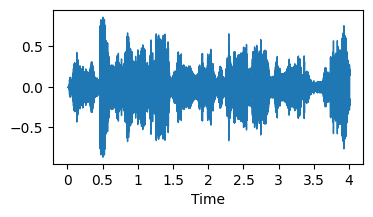

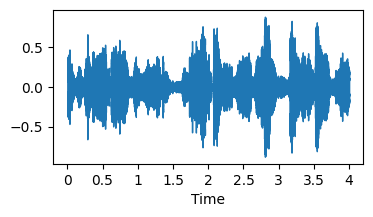

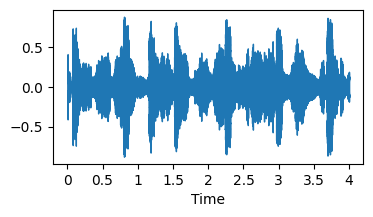

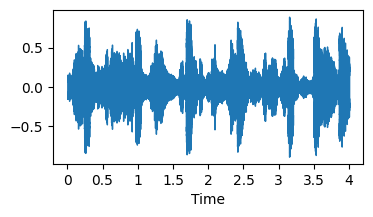

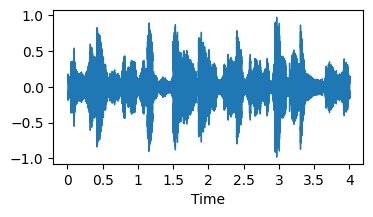

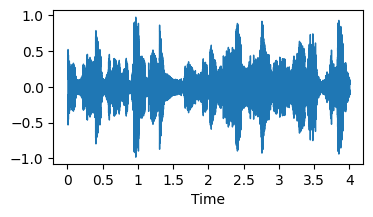

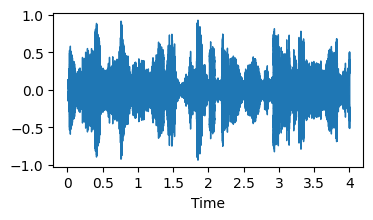

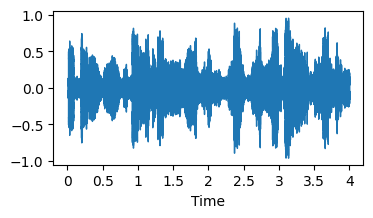

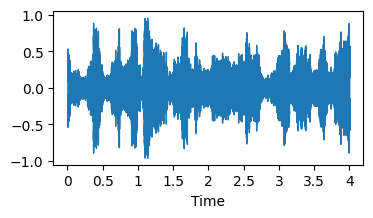

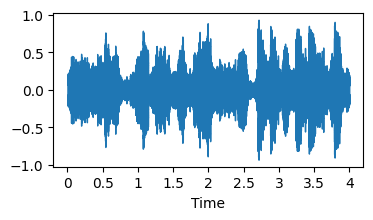

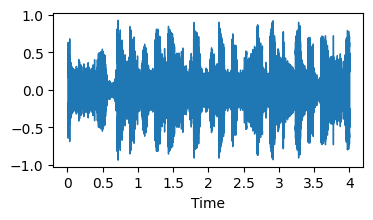

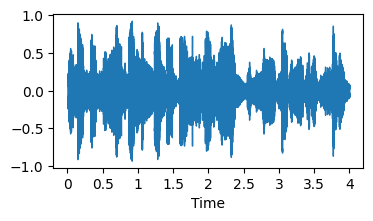

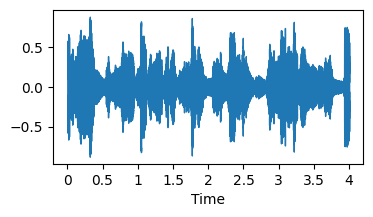

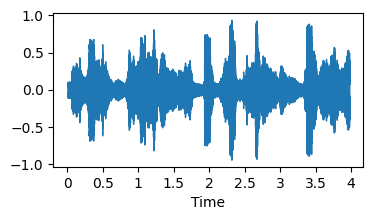

In [8]:
audio_path = "./000002.mp3"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

Melspectrogram Visualtization   

In [9]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()
    

In [10]:
random_file_name = "./000002.mp3"
y,sr = librosa.load(random_file_name,sr=44100)

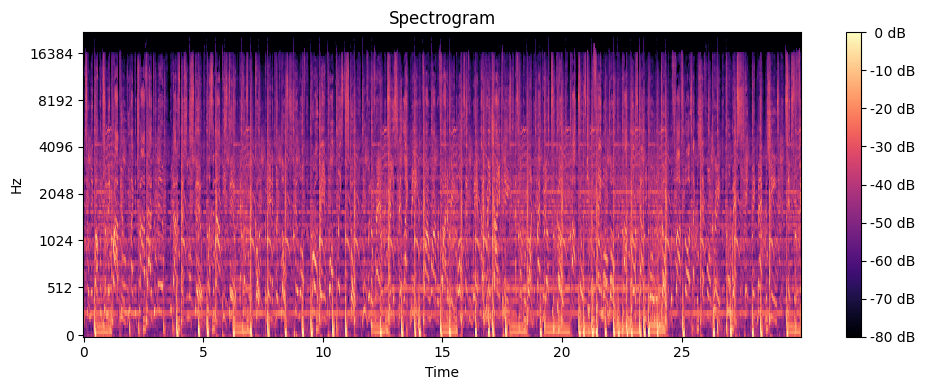

In [11]:
plot_melespectrogram(y,sr)

In [12]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [13]:
random_file_name = "./000002.mp3"
y,sr = librosa.load(random_file_name,sr=44100)

(128, 345)


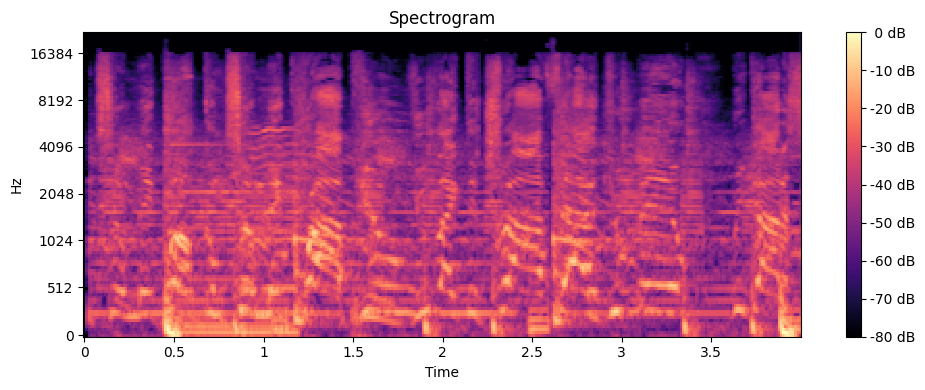

(128, 345)


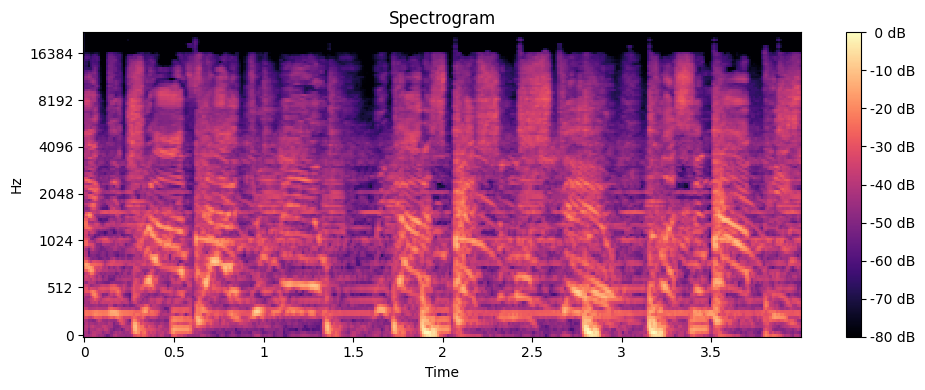

(128, 345)


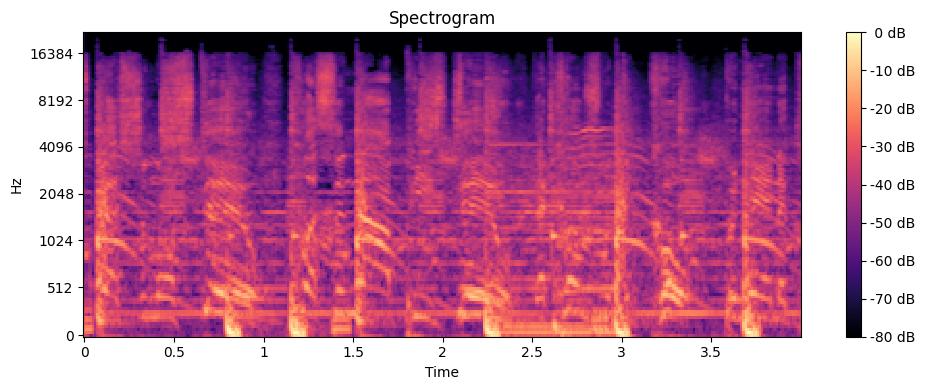

(128, 345)


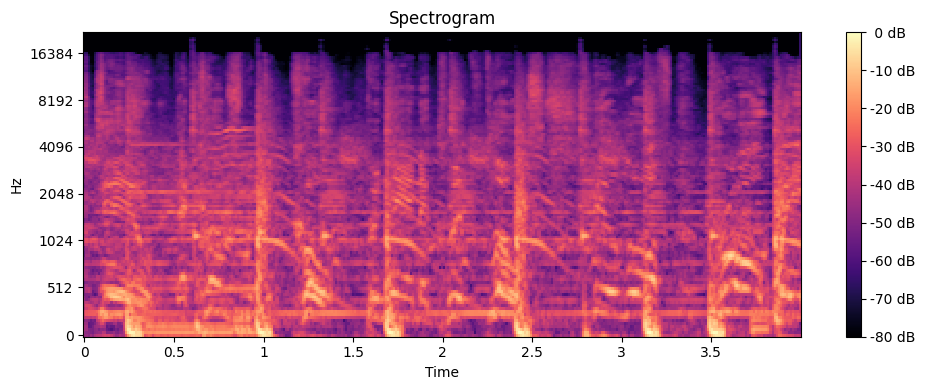

(128, 345)


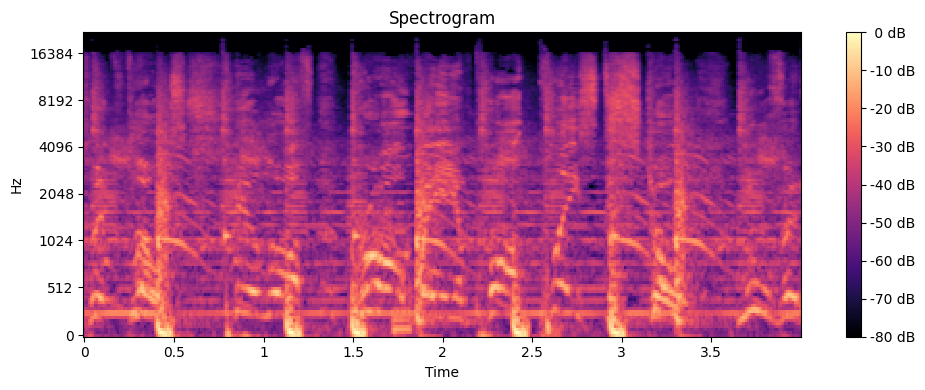

(128, 345)


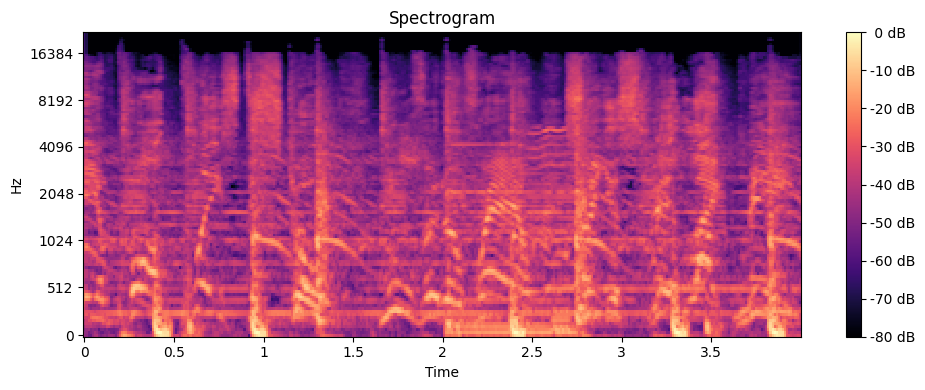

(128, 345)


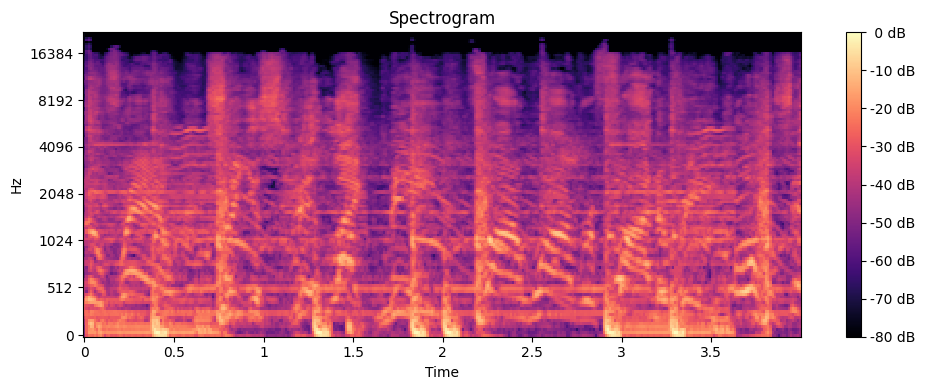

(128, 345)


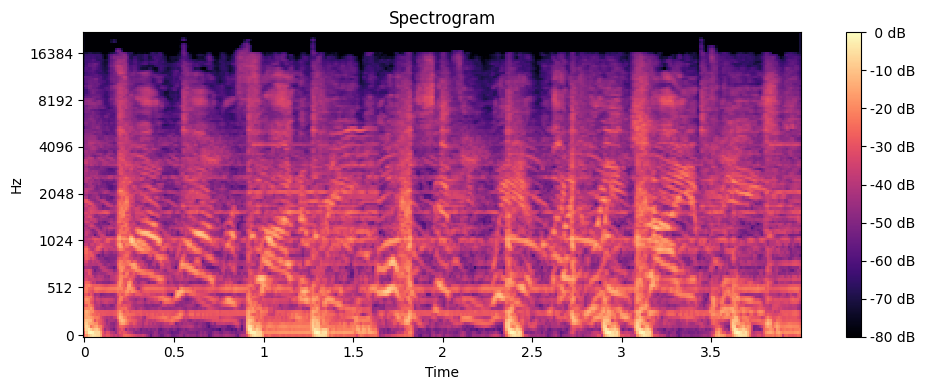

(128, 345)


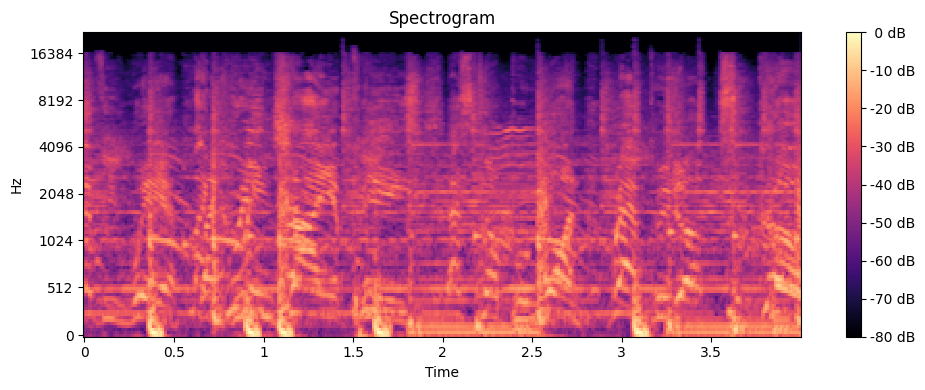

(128, 345)


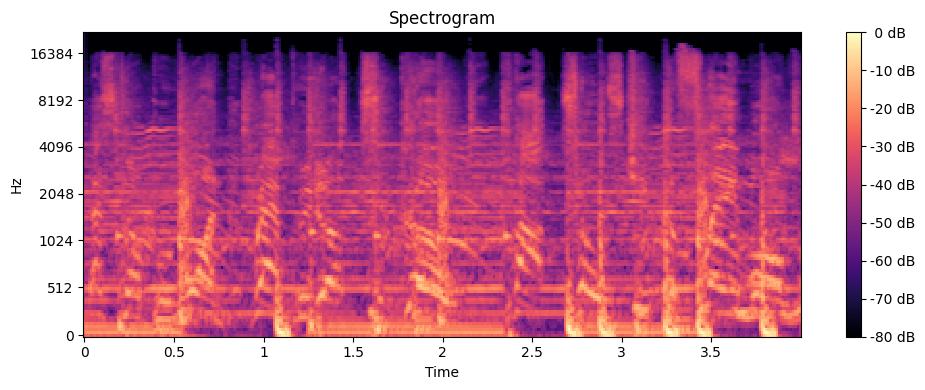

(128, 345)


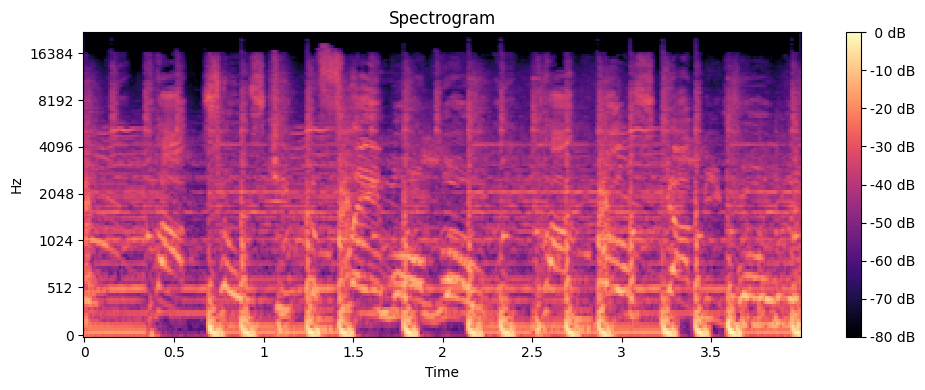

(128, 345)


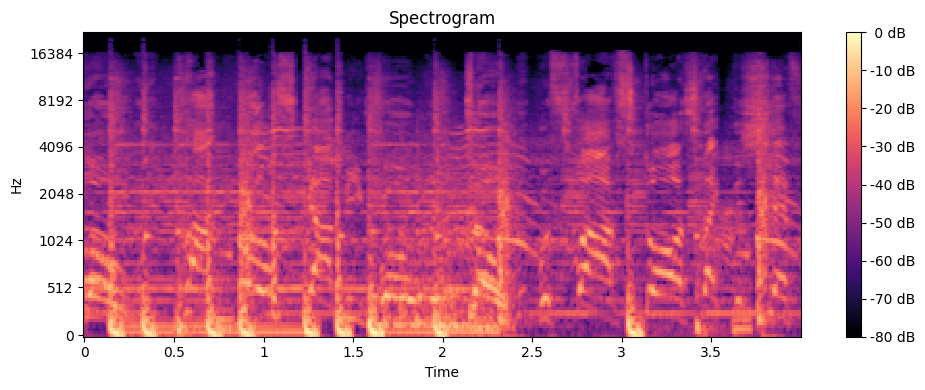

(128, 345)


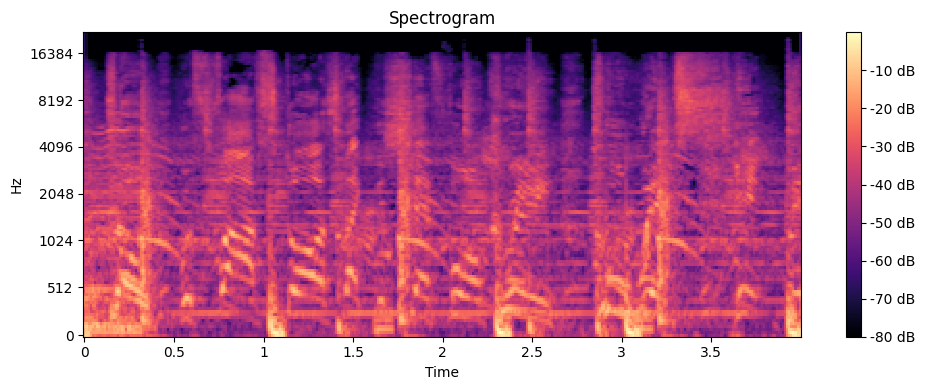

(128, 343)


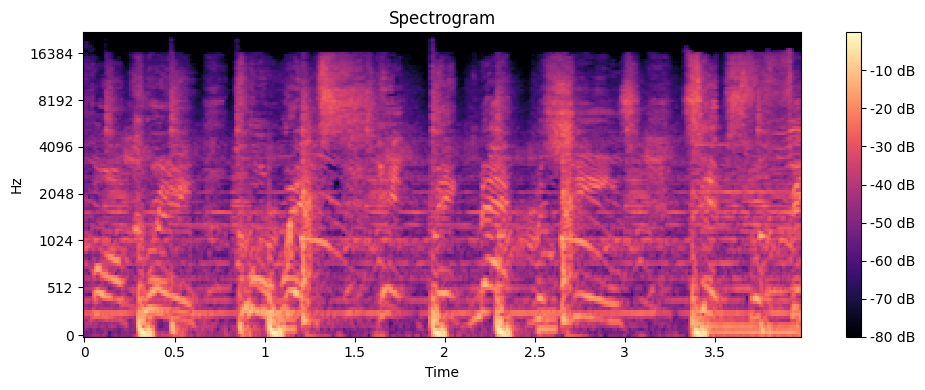

In [14]:
plot_melspectrogram_chunks(y,sr)

In [15]:
128*343

43904

In [16]:
209*210


43890

Data Preprocessing -Final

In [17]:
#define your folder structure
data_dir = "./fma_small"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [18]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
 
    return np.array(data),np.array(labels)

In [19]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [20]:
data.shape

(14975, 150, 150, 1)

In [21]:
labels.shape

(14975,)

In [22]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
labels.shape

(14975, 10)

Splitting of Dataset into Training and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

Building Model

In [25]:
model = tf.keras.models.Sequential()

In [26]:

X_train[0].shape

(150, 150, 1)

In [27]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\sahul\anaconda3\envs\condaenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Dropout(0.3))

In [31]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Dropout(0.3))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(units=1200,activation='relu'))

In [36]:
model.add(Dropout(0.45))

In [37]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax')) #SIGMOID

In [38]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 310s 822ms/step - accuracy: 0.9805 - loss: 0.0561 - val_accuracy: 0.9155 - val_loss: 0.3735
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 270s 720ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9179 - val_loss: 0.3514
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 859ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9075 - val_loss: 0.3959
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 331s 882ms/step - accuracy: 0.9859 - loss: 0.0436 - val_accuracy: 0.9245 - val_loss: 0.2837
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 330s 880ms/step - accuracy: 0.9841 - loss: 0.0441 - val_accuracy: 0.9038 - val_loss: 0.4331
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 333s 889ms/step - accuracy: 0.9844 - loss: 0.0494 - val_accuracy: 0.9075 - val_loss: 0.3619
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 331s 884ms/step - accuracy: 0.9928 - loss: 0.0232 - val_accuracy: 0.9149 - val_loss: 0.3601
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 336s 896ms/step - accuracy: 0.9853 -

In [137]:
model.save("Trained_model.h5") #Windows
model.save("Trained_model.keras") #Mac

In [138]:
training_history.history

{'accuracy': [0.9788814783096313,
  0.983472466468811,
  0.9854757785797119,
  0.9828046560287476,
  0.9836394190788269,
  0.9863105416297913,
  0.9924039840698242,
  0.9838063716888428,
  0.9862270355224609,
  0.9883138537406921,
  0.9863105416297913,
  0.9870617985725403,
  0.9915692806243896,
  0.989983320236206,
  0.9919866323471069,
  0.9853923320770264,
  0.9922370910644531,
  0.9898163676261902,
  0.9912353754043579,
  0.987729549407959,
  0.9873121976852417,
  0.996828019618988,
  0.989983320236206,
  0.9915692806243896,
  0.9897328615188599,
  0.9938230514526367,
  0.9905676245689392,
  0.9878129959106445,
  0.9946577548980713,
  0.9935725927352905],
 'loss': [0.06134044751524925,
  0.0523732528090477,
  0.04688066616654396,
  0.050946563482284546,
  0.04706195369362831,
  0.0442122146487236,
  0.023653099313378334,
  0.05129691958427429,
  0.041983652859926224,
  0.03389593958854675,
  0.040579430758953094,
  0.03703254461288452,
  0.02263297513127327,
  0.03193888068199158,


In [139]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
   json.dump(training_history.history,f)

In [140]:

X_train

array([[[[3.23949524e+02],
         [1.30654602e+02],
         [6.70345449e+00],
         ...,
         [4.34789610e+00],
         [3.36882553e+01],
         [7.33191910e+01]],

        [[6.42828613e+02],
         [3.44813171e+02],
         [2.40324955e+01],
         ...,
         [5.41547813e+01],
         [1.88378082e+02],
         [2.72046265e+02]],

        [[4.72280426e+02],
         [2.40645096e+02],
         [2.22441921e+01],
         ...,
         [1.06598328e+02],
         [3.56269043e+02],
         [2.67052490e+02]],

        ...,

        [[2.59430637e-03],
         [5.44528186e-04],
         [3.36275771e-05],
         ...,
         [2.45643005e-05],
         [3.06418806e-05],
         [6.99046359e-05]],

        [[2.57155229e-03],
         [5.25189156e-04],
         [2.95105201e-06],
         ...,
         [2.10841904e-06],
         [6.14958935e-06],
         [5.34490500e-05]],

        [[2.54536560e-03],
         [5.17699751e-04],
         [7.90506149e-08],
         ...,
 

In [141]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,460 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [142]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [143]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

MODEL EVALUATION 

In [144]:
 #Model evaluation on Training Set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 243ms/step - accuracy: 0.9958 - loss: 0.0087


In [145]:
train_loss,train_accuracy

(0.008472254499793053, 0.9964106678962708)

In [146]:
#model evaluation on valid set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.9280 - loss: 0.3513


In [147]:
val_loss,val_accuracy

(0.38916248083114624, 0.9222036600112915)

In [148]:
training_history_data['loss']
training_history_data['val_loss'] 

[0.37346649169921875,
 0.351396769285202,
 0.39587077498435974,
 0.28365448117256165,
 0.43308719992637634,
 0.36188167333602905,
 0.360084593296051,
 0.4147244393825531,
 0.28009217977523804,
 0.3251338601112366,
 0.30105942487716675,
 0.30962812900543213,
 0.319298654794693,
 0.3360762298107147,
 0.32856854796409607,
 0.33800461888313293,
 0.3562195897102356,
 0.3797838091850281,
 0.3455059826374054,
 0.36568617820739746,
 0.2545086443424225,
 0.29275888204574585,
 0.292643278837204,
 0.3623538315296173,
 0.44343554973602295,
 0.3654293119907379,
 0.3439421057701111,
 0.3219139575958252,
 0.34990304708480835,
 0.38916248083114624]

Accuracy and Loss Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

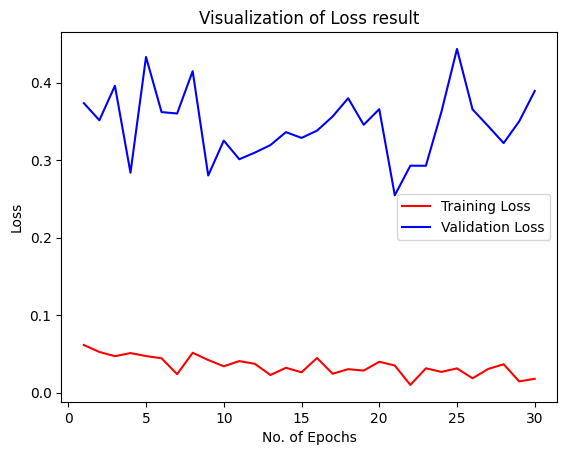

In [149]:
#visualization of data loss
epochs = [i for i in range(1,31)] #list comprehensive
epochs
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color = 'red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color = 'blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss result")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

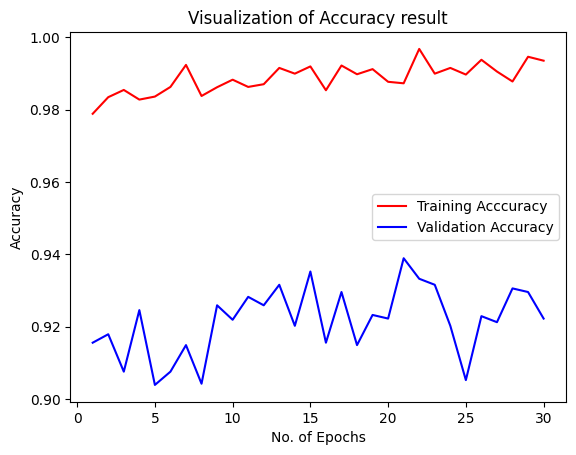

In [150]:
#visualization of Accuracy
epochs = [i for i in range(1,31)] #list comprehensive
epochs
plt.plot(epochs,training_history_data['accuracy'],label="Training Acccuracy",color = 'red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color = 'blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show

Precisio ,Recall,Confusion Matrix -Model Evaluation -2

In [151]:
X_test.shape

(2995, 150, 150, 1)

In [152]:
y_pred =model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step


array([[9.9026716e-09, 6.8896094e-05, 4.4887056e-08, ..., 9.9991274e-01,
        4.2518350e-10, 1.8880321e-07],
       [1.9979343e-19, 4.1434376e-27, 6.7067130e-26, ..., 5.5840967e-27,
        4.3642705e-20, 3.5462362e-18],
       [4.1594041e-14, 7.5775966e-15, 4.9697036e-13, ..., 2.4797816e-12,
        7.5394409e-14, 7.3026456e-09],
       ...,
       [1.0000000e+00, 4.5555651e-23, 1.9034290e-09, ..., 5.3507206e-22,
        2.2385069e-15, 8.0992366e-12],
       [7.2291323e-07, 9.9980623e-01, 5.5988839e-06, ..., 6.6214011e-06,
        1.2960930e-04, 4.4823114e-06],
       [1.3584325e-07, 2.7177410e-12, 2.2568544e-08, ..., 1.3526437e-07,
        1.2120842e-06, 8.0261962e-06]], dtype=float32)

In [153]:
y_pred.shape

(2995, 10)

In [154]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [155]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
Y_test.shape

(2995, 10)

In [157]:
true_categories = np.argmax(y_pred,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [158]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [159]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
#Precision Recall F!Score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       1.00      1.00      1.00       290
   classical       1.00      1.00      1.00       313
     country       1.00      1.00      1.00       305
       disco       1.00      1.00      1.00       299
      hiphop       1.00      1.00      1.00       323
        jazz       1.00      1.00      1.00       309
       metal       1.00      1.00      1.00       310
         pop       1.00      1.00      1.00       277
      reggae       1.00      1.00      1.00       286
        rock       1.00      1.00      1.00       283

    accuracy                           1.00      2995
   macro avg       1.00      1.00      1.00      2995
weighted avg       1.00      1.00      1.00      2995



Confusion Matrix Visualization

In [160]:
cm

array([[290,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 313,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 305,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 299,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 323,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 309,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 310,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 277,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 286,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 283]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

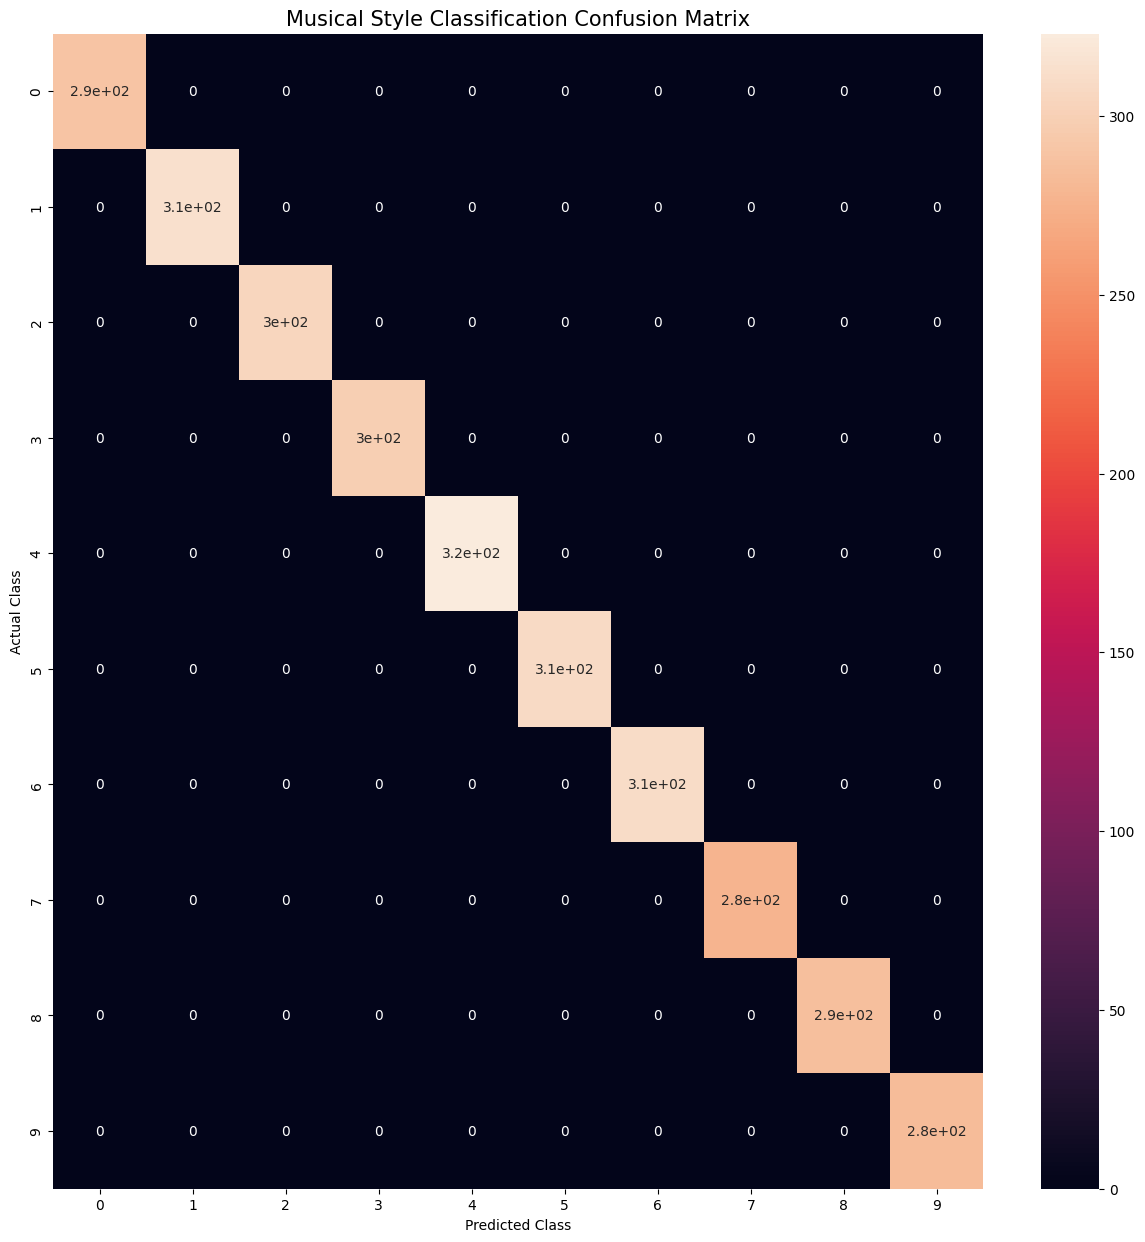

In [161]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot =True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Musical Style Classification Confusion Matrix",fontsize =15)
plt.show